In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import datetime as dt

In [2]:
udemy = pd.read_csv("Udemy_clean.csv")
display(udemy)

,published_time,id,title,url,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__price_string,price_detail__price_string,final_price
0,2018-07-17 21:35:14+00:00,1794086,Blockchain și Bitcoin pe înțelesul tuturor - g...,/course/blockchain-si-bitcoin-pe-intelesul-tut...,True,271,5.0,90,False,27,0,6.1,51.52,45.42
1,2020-03-24 21:02:54+00:00,2892636,Xero Not for Profit Organization,/course/xero-not-for-profit-organization/,True,5173,5.0,1,False,34,0,6.1,115.91,109.81
2,2018-03-26 22:36:40+00:00,1593672,Take Control of Your Future - Understand Crypt...,/course/take-control-of-your-future-start-unde...,True,266,5.0,2,False,22,0,6.1,85.86,79.76
3,2014-12-04 16:18:14+00:00,354864,Mastering QuickBooks v 2015 for Lawyers Traini...,/course/mastering-quickbooks-v-2015-for-lawyer...,True,59,5.0,2,False,27,0,6.1,17.17,11.07
4,2018-08-01 20:37:36+00:00,1814396,Accounting Cycle- Test Questions Only,/course/accounting-cycle-test-questions-only/,True,920,5.0,2,False,50,0,6.1,17.17,11.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,2014-06-09 19:57:50+00:00,187846,Repeat Business Skills For Techies,/course/repeat-business-skills-for-techies/,True,175,1.5,3,False,52,0,6.1,21.46,15.36
9482,2020-06-29 21:41:52+00:00,2796638,International Trade Policy/ For business growt...,/course/international-trade-policy-for-busines...,True,135,5.0,1,False,11,0,6.1,17.17,11.07
9483,2019-02-19 18:19:34+00:00,2188424,Financial Freedom,/course/financial-freedom-a/,True,838,5.0,3,False,18,0,6.1,17.17,11.07
9484,2018-04-17 21:49:43+00:00,787084,Forex Foundation Course,/course/forex-foundation/,True,182,5.0,1,False,56,0,6.1,17.17,11.07


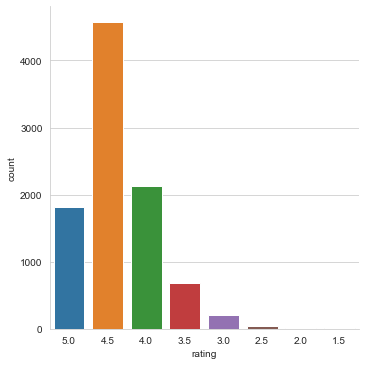

4.5    4577
4.0    2136
5.0    1822
3.5     687
3.0     200
2.5      40
2.0      18
1.5       6
Name: rating, dtype: int64

In [3]:
sns.set_style("whitegrid")
sns.catplot(x="rating",data=udemy,kind="count",order=udemy["rating"].sort_values(ascending=False).unique())
plt.show()

display(udemy["rating"].value_counts())

We can notice, that the main ratings are found between 4 and 5 which can means that the subscribers are in a great level satisfy with the quality of the courses.

But has the price anything to do with the rating?

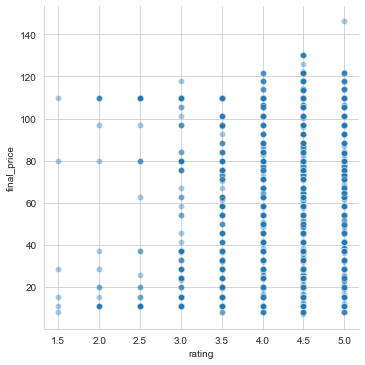

Pearson: 0.11


In [4]:
sns.relplot(x="rating",y="final_price",data=udemy,kind="scatter",alpha=0.4)
plt.show()

correlation,pvalue = sc.stats.pearsonr(udemy["rating"],udemy["final_price"])
print("Pearson:",round(correlation,2))

According to the relational-plot and to the pearson coeficcient that there is not a strong relationship beetween the rating and the final_price.

In [19]:
#even when I passed to datetime type, I have to do it again.
udemy["published_time"] = pd.to_datetime(udemy["published_time"])
assert udemy["published_time"].dtype == "datetime64[ns, UTC]"                            

lets explore how the num of subscribers has aumented throught time.

In [47]:
years = udemy["published_time"].dt.year.unique() #Unique year for X axis
udemy["years"] = udemy["published_time"].dt.year #
sum_subs = udemy.groupby("years")["num_subscribers"].sum()

In [66]:
plt.style.use("ggplot")

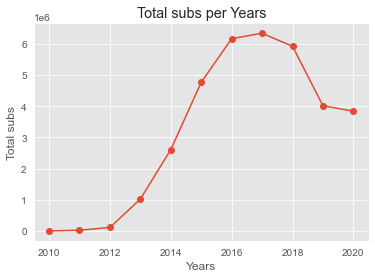

years
2010    2268.000000
2011    2839.777778
2012    1901.355932
2013    3789.425926
2014    4476.480274
2015    3776.417591
2016    5639.985361
2017    4325.911945
2018    2938.783019
2019    2490.374922
2020    3432.395889
Name: num_subscribers, dtype: float64

In [68]:
sum_subs.plot(x=years,y="num_subscribers",kind="line",marker="o")
plt.ylabel("Total subs")
plt.xlabel("Years")
plt.title("Total subs per Years")
plt.show()

display(num_subs)

It seams that between 2018 and 2020 the num of subscribers went down 